In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/zalando-store-crawl/zalando/longsleeve/PI922OA2T-Q12@8.jpg
/kaggle/input/zalando-store-crawl/zalando/longsleeve/OS322S0B2-Q11@10.jpg
/kaggle/input/zalando-store-crawl/zalando/longsleeve/DI622O01F-Q11@10.jpg
/kaggle/input/zalando-store-crawl/zalando/longsleeve/SO222O0OS-C11@20.jpg
/kaggle/input/zalando-store-crawl/zalando/longsleeve/TO722O0M6-C11@13.1.jpg
/kaggle/input/zalando-store-crawl/zalando/longsleeve/HU722S01Y-Q11@8.jpg
/kaggle/input/zalando-store-crawl/zalando/longsleeve/NA622P024-K11@15.1.jpg
/kaggle/input/zalando-store-crawl/zalando/longsleeve/QU122O0BH-C11@2.1.jpg
/kaggle/input/zalando-store-crawl/zalando/longsleeve/PS722O01F-Q11@8.jpg
/kaggle/input/zalando-store-crawl/zalando/longsleeve/TO122O062-C11@7.jpg
/kaggle/input/zalando-store-crawl/zalando/longsleeve/BO722P005-K11@8.jpg
/kaggle/input/zalando-store-crawl/zalando/longsleeve/LEP22P000-Q11@8.jpg
/kaggle/input/zalando-store-crawl/zalando/longsleeve/2LA22P00U-Q11@10.jpg
/kaggle/input/zalando-store-crawl/zalan

# Notebook to run Classification on Fashion Images.

Data Images are conatined in the foler 'zalando', which contains subfolders: "hoodies","hoodies-female","longsleeve","shirt","sweatshirt","sweatshirt-female"
Each folder contains around 1500-3500 high-resolution images.

## Notebook Contents: 
1. Image Preprocessing and data visualisation
2. Simple CNN model for multi-label classification
3. VGG16 model for for multi-label classification




In [3]:
#check size of and example image
import cv2
img = cv2.imread("../input/zalando-store-crawl/zalando/hoodies-female/10K21J006-C11@8.jpg")
img.shape

(875, 606, 3)

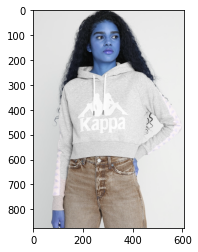

In [4]:
# Show example images
import matplotlib.pyplot as plt

plt.imshow(img)

In [6]:
DATADIR = "../input/zalando-store-crawl/zalando"

In [7]:
# df with filename and label may be useful
import glob
hoodies_list= glob.glob(DATADIR+'/hoodies/*.jpg')
hoodies_f_list= glob.glob(DATADIR+'/hoodies-female/*.jpg')
sweatshirt_list= glob.glob(DATADIR+'/sweatshirt/*.jpg')
sweatshirt_f_list=glob.glob(DATADIR+'/sweatshirt-female/*.jpg')
shirt_list=glob.glob(DATADIR+'/shirt/*.jpg')
longsleeve_list=glob.glob(DATADIR+'/longsleeve/*.jpg')

In [8]:
import pandas as pd
df= pd.DataFrame(hoodies_list, columns=['filename'])
df['category']= ['hoodies'] * len(hoodies_list)


In [9]:
df2= pd.DataFrame(hoodies_f_list, columns=['filename'])
df2['category']= ['hoodies_female'] * len(hoodies_f_list)
df3= pd.DataFrame(sweatshirt_list, columns=['filename'])
df3['category']= ['sweatshirt'] * len(sweatshirt_list)
df4= pd.DataFrame(sweatshirt_f_list, columns=['filename'])
df4['category']= ['sweatshirt_female'] * len(sweatshirt_f_list)
df5= pd.DataFrame(shirt_list, columns=['filename'])
df5['category']= ['shirt'] * len(shirt_list)
df6= pd.DataFrame(longsleeve_list, columns=['filename'])
df6['category']= ['longsleeve'] * len(longsleeve_list)

In [10]:
frames = [df, df2, df3, df4, df5, df6]
result = pd.concat(frames)
result

filename    category
0     ../input/zalando-store-crawl/zalando/hoodies/1...     hoodies
1     ../input/zalando-store-crawl/zalando/hoodies/H...     hoodies
2     ../input/zalando-store-crawl/zalando/hoodies/2...     hoodies
3     ../input/zalando-store-crawl/zalando/hoodies/N...     hoodies
4     ../input/zalando-store-crawl/zalando/hoodies/W...     hoodies
...                                                 ...         ...
1694  ../input/zalando-store-crawl/zalando/longsleev...  longsleeve
1695  ../input/zalando-store-crawl/zalando/longsleev...  longsleeve
1696  ../input/zalando-store-crawl/zalando/longsleev...  longsleeve
1697  ../input/zalando-store-crawl/zalando/longsleev...  longsleeve
1698  ../input/zalando-store-crawl/zalando/longsleev...  longsleeve

[16175 rows x 2 columns]

Text(0, 0.5, 'Image count')

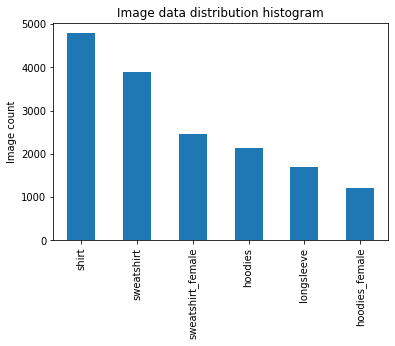

In [11]:
import matplotlib.pyplot as plt
result['category'].value_counts().plot.bar()
plt.title('Image data distribution histogram')
plt.ylabel('Image count')

Data is slightly imbalanced: class imbalance may leads you to believe your model is better than it really is.

## Generate train test data

We haven't split data into train/test yet. 
Use ImageDataGenerator to augment images automatically when training the model. 
rotation_range, width_shift_range, height_shift_range and zoom_range are specified as as factors, and also a horizontal flip and brightness adjustments are applied.

In [12]:
#train_test_generation
import tensorflow as tf

data_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale= 1/255.,                                                                                                                   
                                                           rotation_range=0.2,
                                                           width_shift_range=0.2,
                                                           height_shift_range=0.2,
                                                           zoom_range = [0.9,1.1], 
                                                           horizontal_flip=True,
                                                           brightness_range=[0.9,1.1],
                                                           validation_split = 0.2
                                                            ) #validation: take 20%

In [16]:
# using keras flow_from_directory
# generate training and test data. resize images


train_data = data_gen.flow_from_directory(DATADIR,
                                           target_size = (224,224),
                                           class_mode = "categorical",
                                           color_mode= "rgb",
                                           seed = 5,
                                           classes = ["hoodies","hoodies-female","longsleeve","shirt","sweatshirt","sweatshirt-female"],
                                           subset = "training",
                                           )

test_data = data_gen.flow_from_directory(DATADIR,
                                         target_size = (224,224),
                                         class_mode = "categorical",
                                         color_mode= "rgb",
                                         classes = ["hoodies","hoodies-female","longsleeve","shirt","sweatshirt","sweatshirt-female"],
                                         seed = 5,
                                         subset = "validation",
                                         shuffle=False
                                         )

Found 12947 images belonging to 6 classes.
Found 3233 images belonging to 6 classes.


In [17]:
labels = list(train_data.class_indices.keys())

2022-04-05 05:02:17.418375: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-05 05:02:17.428816: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-05 05:02:17.429573: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-05 05:02:17.430782: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

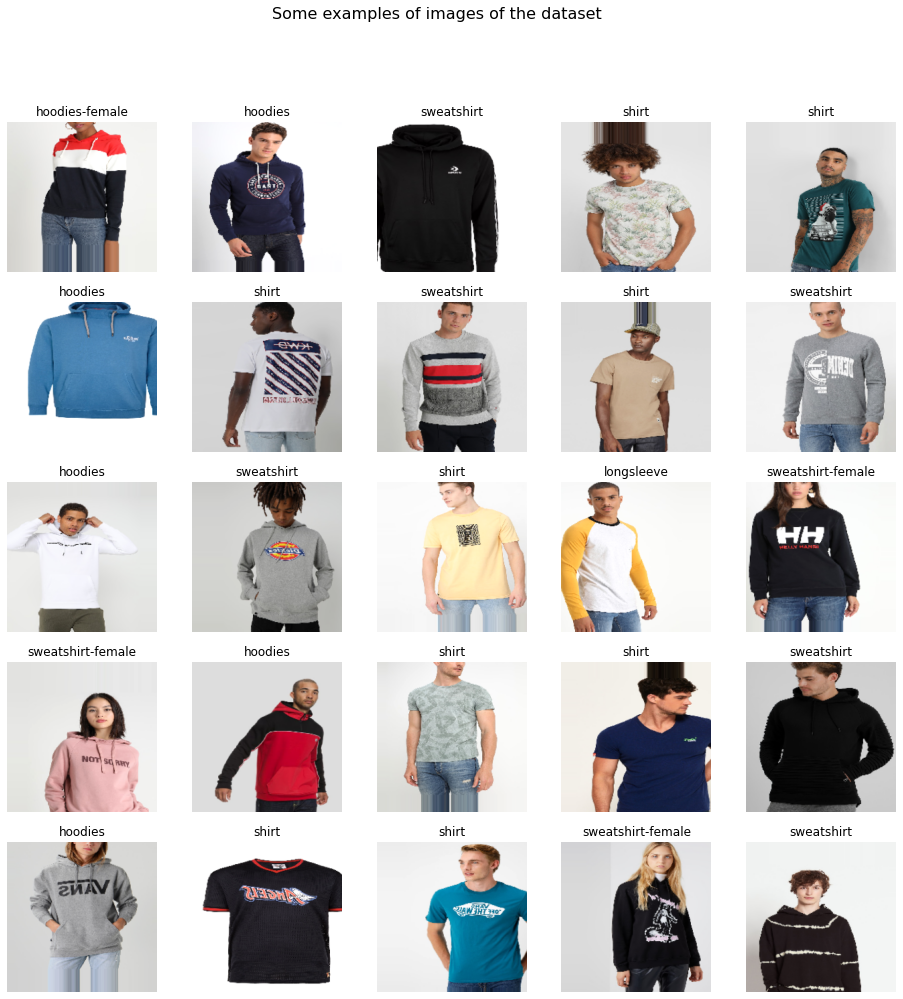

In [18]:
# visualizing the train dataset

import matplotlib.pyplot as plt
import tensorflow as tf

fig= plt.figure(figsize = (16,16))
fig.suptitle("Some examples of images of the dataset", fontsize=16)
for i in range(25):
  image,label = train_data.next()
  plt.subplot(5,5,i+1)
  plt.imshow(image[i],cmap=plt.cm.binary)
  plt.title(labels[tf.argmax(label[i])])
  plt.axis("off")

For a simple CNN model, 
Steps are:

Build model,
Compile model,
Train / fit the data to the model,
Evaluate the model on the validation set,
Carry out an error analysis of our model.

Conv2D: (32 filters of size 3 by 3) The features will be "extracted" from the image.
MaxPooling2D: The images get half sized.
Flatten: Transforms the format of the images from a 2d-array to a 1d-array of 150 150 3 pixel values.
Relu : given a value x, returns max(x, 0).
Softmax: 6 neurons, probability that the image belongs to one of the classes.

In [24]:
# Building a CNN model 
import tensorflow as tf
from tensorflow.keras import layers
model  = tf.keras.Sequential([
                              
                              layers.Conv2D(32, kernel_size= 3, activation="relu", input_shape=(224,224,3)),
                              layers.MaxPooling2D(pool_size= 2),

                              layers.Conv2D(filters = 32, kernel_size= 3, activation= "relu"),
                              layers.MaxPooling2D(pool_size= 2),
                              layers.Conv2D(filters = 32, kernel_size= 3, activation= "relu"),
                              layers.MaxPooling2D(pool_size= 2),

                              layers.Flatten(),

                              layers.Dense(128, activation="relu"),
                              layers.Dropout(0.5),

                              layers.Dense(6, activation= "softmax")
])

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 109, 109, 32)      9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 52, 52, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 26, 26, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 21632)            

Then, we can compile:

Optimizer: adam = RMSProp + Momentum

Momentum = takes into account past gradient to have a better update.

RMSProp = exponentially weighted average of the squares of past gradients.

Loss function: we use sparse categorical crossentropy: each images belongs to one class only

In [26]:
# compiling the model

model.compile(
    loss = tf.keras.losses.categorical_crossentropy,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

In [27]:
# fitting data to the model
batch_size=1
r= model.fit(train_data,
          epochs = 5,
          steps_per_epoch = len(train_data)/batch_size,
          validation_data = test_data,
          validation_steps = len(test_data)/batch_size,
          )

Epoch 1/5
405/405 [==============================] - 398s 982ms/step - loss: 1.6633 - accuracy: 0.3349 - val_loss: 1.5576 - val_accuracy: 0.3916
Epoch 2/5
405/405 [==============================] - 397s 980ms/step - loss: 1.4029 - accuracy: 0.4549 - val_loss: 1.3611 - val_accuracy: 0.4757
Epoch 3/5
405/405 [==============================] - 396s 979ms/step - loss: 1.2355 - accuracy: 0.5187 - val_loss: 1.2715 - val_accuracy: 0.4943
Epoch 4/5
405/405 [==============================] - 397s 980ms/step - loss: 1.1556 - accuracy: 0.5476 - val_loss: 1.2198 - val_accuracy: 0.5156
Epoch 5/5
405/405 [==============================] - 396s 979ms/step - loss: 1.1038 - accuracy: 0.5679 - val_loss: 1.1892 - val_accuracy: 0.5159


In [28]:
model_evaluation = model.evaluate(test_data)

102/102 [==============================] - 81s 795ms/step - loss: 1.1912 - accuracy: 0.5184


In [29]:
print(f"Model Accuracy: {model_evaluation[1] * 100 : 0.2f} %")

Model Accuracy:  51.84 %


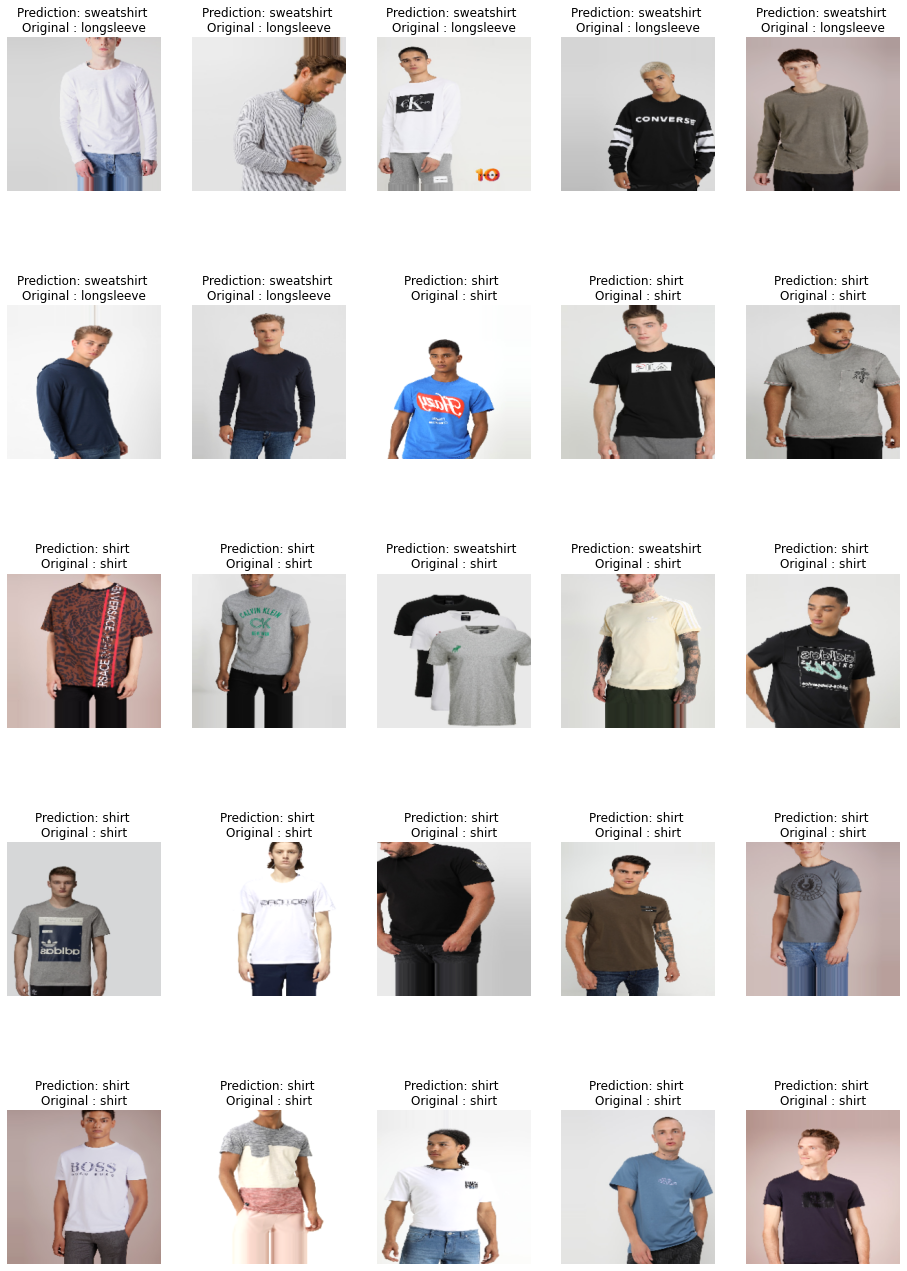

In [31]:
# visualizing the Test Data Predictions

import matplotlib.pyplot as plt
import tensorflow as tf

fig= plt.figure(figsize = (16,16))
for i in range(25):
  image,label = test_data.next()
  model_pred = model.predict(image)
    
  plt.subplot(5,5,i+1)
  plt.imshow(image[i],cmap=plt.cm.binary)
  plt.title(f"Prediction: {labels[tf.argmax(model_pred[i])]} \nOriginal : {labels[tf.argmax(label[i])]}")
  plt.subplots_adjust(top= 1.25)
  plt.axis("off")


In [32]:
def plot_accuracy_loss(r):
    """
        Plot the accuracy and the loss during the training of the nn.
    """
    fig = plt.figure(figsize=(10,5))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(r.history['accuracy'],'bo--', label = "acc")
    plt.plot(r.history['val_accuracy'], 'ro--', label = "val_acc")
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(222)
    plt.plot(r.history['loss'],'bo--', label = "loss")
    plt.plot(r.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()

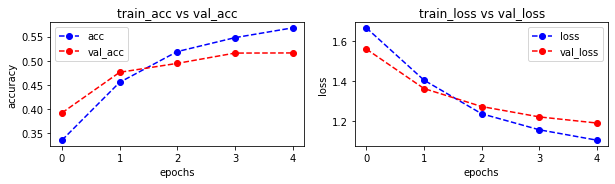

In [33]:
plot_accuracy_loss(r)

In [34]:
X_test, y_test = next(test_data)

Category index:

hoodies = 0
hoodies_female = 1
longsleeve = 2
shirt = 3
sweatshirt = 4
sweatshirt-female = 5
Confusion between:

hoodies and sweatshirt
hoodies-female and sweatshirt-female.
Shirts are more distinct so get correctly labeled the most often.

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
----------------------
                    precision    recall  f1-score   support

          hoodies       0.19      0.01      0.02       428
   hoodies-female       0.00      0.00      0.00       241
       longsleeve       0.00      0.00      0.00       339
            shirt       0.82      0.94      0.88       957
       sweatshirt       0.36      0.88      0.51       777
sweatshirt-female       0.45      0.19      0.27       491

         accuracy                           0.52      3233
        macro avg       0.30      0.34      0.28      3233
     weighted avg       0.42      0.52      0.43      3233



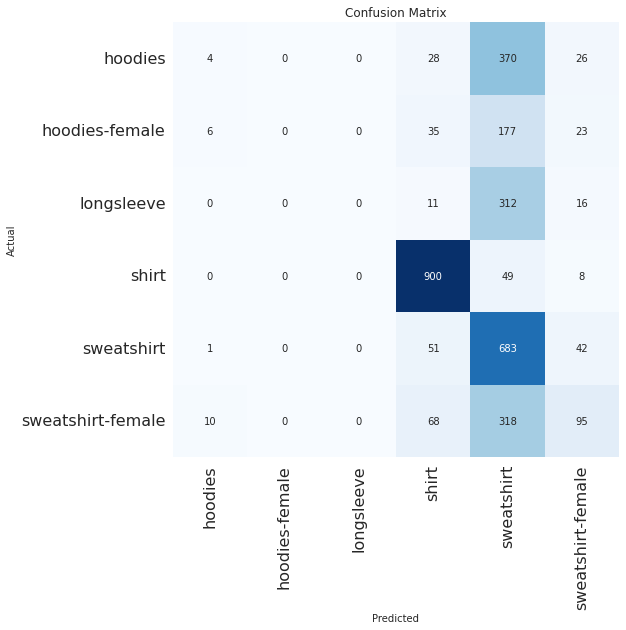

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import seaborn as sns
sns.set_style('darkgrid')

def cm_cr(test_gen, model):
    preds=model.predict(test_gen)    
    labels=test_gen.labels
    classes=list(test_gen.class_indices.keys()) # ordered lst of class names 
    pred_list=[ ] # will store the predicted classes here
    true_list=[]
    for i, p in enumerate (preds):
        index=np.argmax(p)
        pred_list.append(classes[index])
        true_list.append(classes[labels[i]])
    y_pred=np.array(pred_list)
    y_true=np.array(true_list)
    clr = classification_report(y_true, y_pred, target_names=classes)
    print("Classification Report:\n----------------------\n", clr)
    cm = confusion_matrix(y_true, y_pred )        
    length=len(classes)
    if length<8:
        fig_width=8
        fig_height=8
    else:
        fig_width= int(length * .5)
        fig_height= int(length * .5)
    plt.figure(figsize=(fig_width, fig_height))
    sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)       
    plt.xticks(np.arange(length)+.5, classes, rotation= 90, fontsize=16)
    plt.yticks(np.arange(length)+.5, classes, rotation=0, fontsize=16)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

cm_cr(test_data, model)

# VGG16 model

In [39]:
import tensorflow as tf

base_model = tf.keras.applications.VGG16(input_shape = (224, 224, 3), 
                                         include_top = False, 
                                         weights = 'imagenet')

base_model.trainable = False

In [41]:
# building a VGG Model

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model

last_layer = base_model.get_layer('block5_pool')
print('last layer of vgg : output shape: ', last_layer.output_shape)
last_output= last_layer.output

x = layers.Flatten()(last_output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)                  
x = layers.Dense(6, activation='softmax')(x)           

vgg_model = Model(base_model.input, x) 


# compiling the model
vgg_model.compile(
    loss = tf.keras.losses.categorical_crossentropy,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
    )
# fitting data

r= vgg_model.fit(
    train_data,
    epochs = 7,
    steps_per_epoch = len(train_data),
    validation_data = test_data,
    validation_steps = len(test_data)
)

last layer of vgg : output shape:  (None, 7, 7, 512)
Epoch 1/7
405/405 [==============================] - 422s 1s/step - loss: 1.4207 - accuracy: 0.5583 - val_loss: 0.9394 - val_accuracy: 0.5982
Epoch 2/7
405/405 [==============================] - 407s 1s/step - loss: 0.8703 - accuracy: 0.6222 - val_loss: 1.0029 - val_accuracy: 0.5772
Epoch 3/7
405/405 [==============================] - 405s 1000ms/step - loss: 0.8211 - accuracy: 0.6388 - val_loss: 0.9310 - val_accuracy: 0.5964
Epoch 4/7
405/405 [==============================] - 403s 996ms/step - loss: 0.8009 - accuracy: 0.6448 - val_loss: 0.8859 - val_accuracy: 0.6189
Epoch 5/7
405/405 [==============================] - 403s 994ms/step - loss: 0.7667 - accuracy: 0.6545 - val_loss: 0.8672 - val_accuracy: 0.6097
Epoch 6/7
405/405 [==============================] - 403s 995ms/step - loss: 0.7577 - accuracy: 0.6603 - val_loss: 0.8426 - val_accuracy: 0.6350
Epoch 7/7
405/405 [==============================] - 404s 997ms/step - loss: 0.749

In [42]:
vgg_model_evaluation = vgg_model.evaluate(test_data)

102/102 [==============================] - 83s 817ms/step - loss: 0.8347 - accuracy: 0.6090


In [43]:
print(f"VGG16 Model Accuracy: {vgg_model_evaluation[1] * 100 :0.2f} %")

VGG16 Model Accuracy: 60.90 %


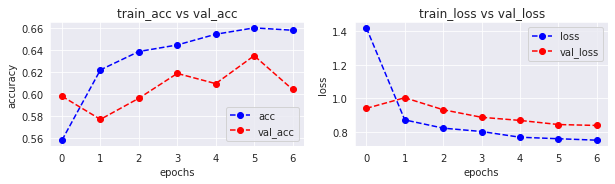

In [47]:
plot_accuracy_loss(r)

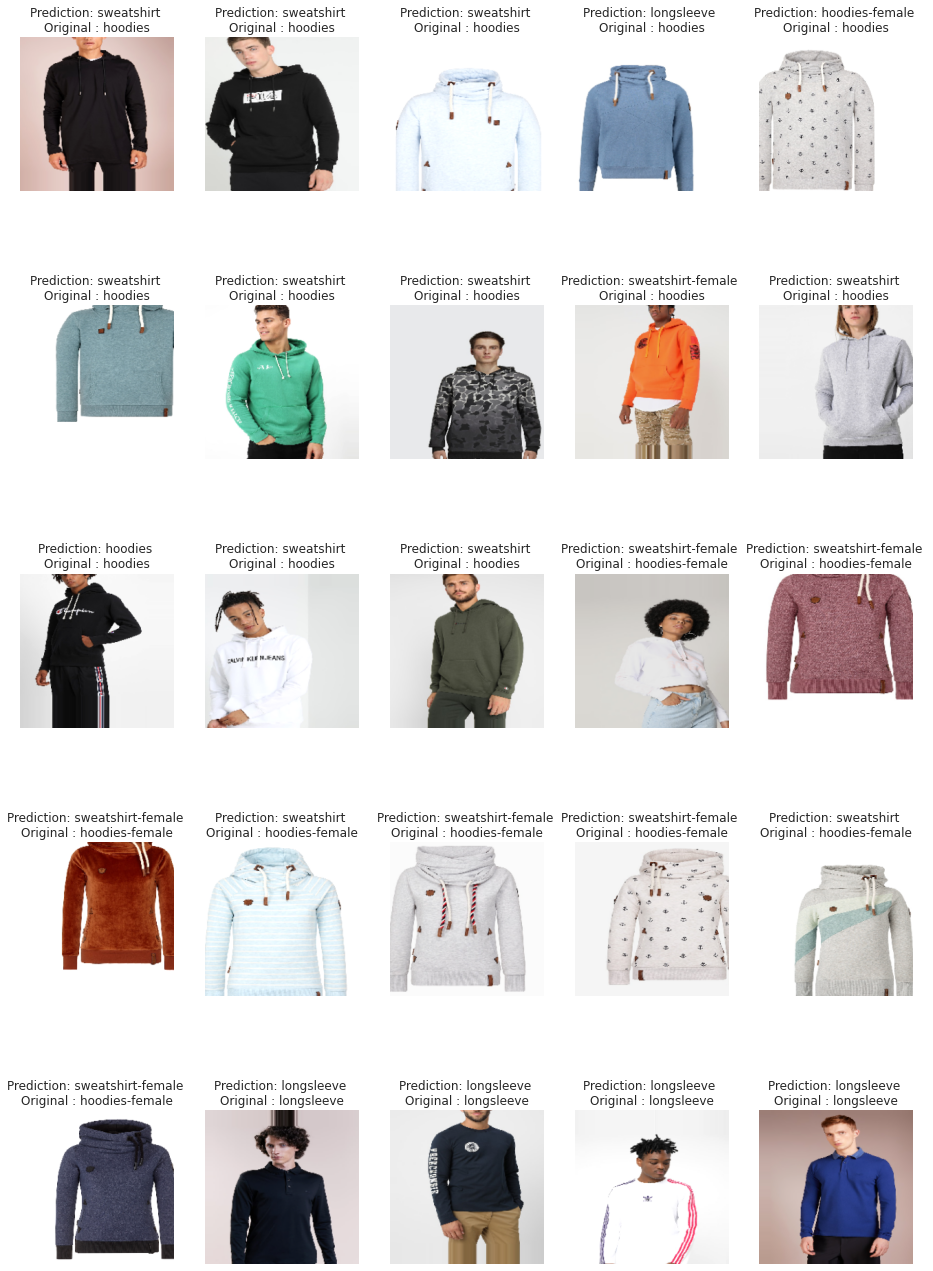

In [48]:
# predicting and visualizing the test data


fig= plt.figure(figsize = (16,16))
for i in range(25):
  image,label = test_data.next()
  vgg_model_pred = vgg_model.predict(image)
    
  plt.subplot(5,5,i+1)
  plt.imshow(image[i],cmap=plt.cm.binary)
  plt.title(f"Prediction: {labels[tf.argmax(vgg_model_pred[i])]} \nOriginal : {labels[tf.argmax(label[i])]}")
  plt.subplots_adjust(top= 1.25)
  plt.axis("off")

Classification Report:
----------------------
                    precision    recall  f1-score   support

          hoodies       0.53      0.13      0.21       428
   hoodies-female       0.33      0.06      0.10       241
       longsleeve       0.36      0.75      0.49       339
            shirt       0.97      0.95      0.96       957
       sweatshirt       0.46      0.55      0.50       777
sweatshirt-female       0.59      0.61      0.60       491

         accuracy                           0.61      3233
        macro avg       0.54      0.51      0.48      3233
     weighted avg       0.62      0.61      0.58      3233



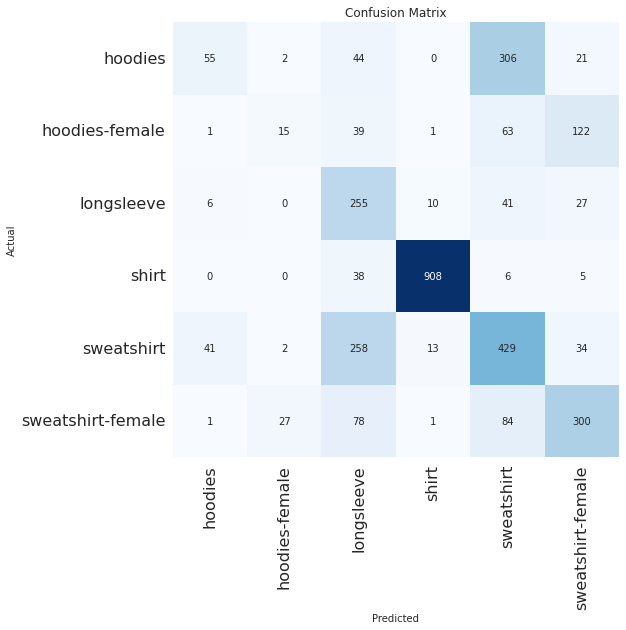

In [49]:
cm_cr(test_data, vgg_model)

In [51]:
# Save model

vgg_model.save_weights('/kaggle/working/vgg_model.h5')
model.save_weights('/kaggle/working/simple_CNN_model.h5')

# Save Model 